# Using Data Science to Understand What Makes Wine Taste Good

## Section 1: Data Exploration

In this section, we'll do some exploratory analysis to understand the nature of our data and the underlying distribution.

### First, import some necessary libraries. 

### Click the below cell block and run it.

In [2]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import seaborn as sns
from time import time
from IPython.display import display # Allows the use of display() for displaying DataFrames

import matplotlib.pyplot as plt

# Pretty display for notebooks
%matplotlib inline

### Next, we'll load the dataset for white wines, and display the first 5 columns. Run the below cell block

In [40]:
# Load the Red Wines dataset
data = pd.read_csv("winequality-white.csv", sep=';')

# Display the first five records
display(data.head(n=5))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## Now, let's do some basic preliminary analysis of our data:

### We'll begin by first seeing if our data has any missing information

In [4]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Examine the features in the data-set and their data types

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [6]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


# Section 2: Exploring Relationships between features

In [7]:
# Explorar las relaciones entre variables

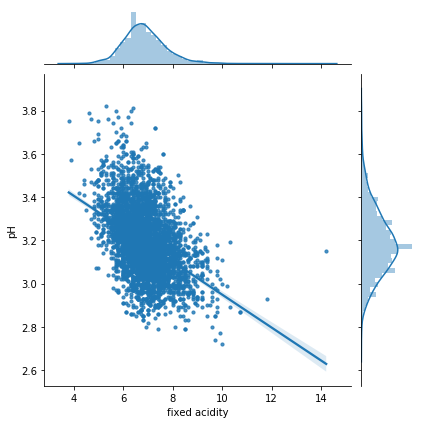

In [9]:
#Create a new dataframe containing only pH and fixed acidity columns to visualize their co-relations
fixedAcidity_pH = data[['pH', 'fixed acidity']]

#Initialize a joint-grid with the dataframe, using seaborn library
gridA = sns.JointGrid(x="fixed acidity", y="pH", data=fixedAcidity_pH, height=6)

#Draws a regression plot in the grid 
gridA = gridA.plot_joint(sns.regplot, scatter_kws={"s": 10})

#Draws a distribution plot in the same grid
gridA = gridA.plot_marginals(sns.distplot)


#### Citric_acid and fixed acidity

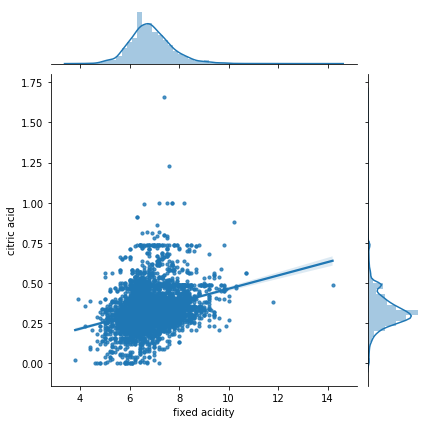

In [11]:
#Create a new dataframe containing only pH and fixed acidity columns to visualize their co-relations
fixedAcidity_Citric_acid = data[['citric acid', 'fixed acidity']]

#Initialize a joint-grid with the dataframe, using seaborn library
gridA = sns.JointGrid(x="fixed acidity", y="citric acid", data=fixedAcidity_Citric_acid, height=6)

#Draws a regression plot in the grid 
gridA = gridA.plot_joint(sns.regplot, scatter_kws={"s": 10})

#Draws a distribution plot in the same grid
gridA = gridA.plot_marginals(sns.distplot)

#### density and fixed acidity

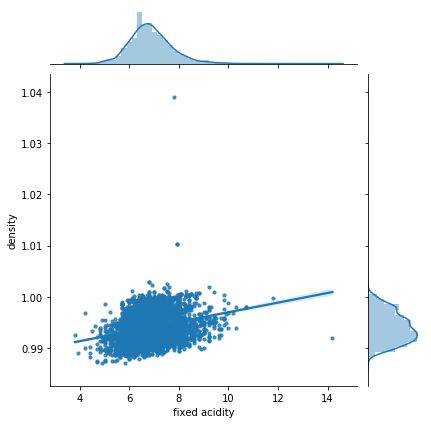

In [12]:
#Create a new dataframe containing only pH and fixed acidity columns to visualize their co-relations
fixedAcidity_density = data[['density', 'fixed acidity']]

#Initialize a joint-grid with the dataframe, using seaborn library
gridA = sns.JointGrid(x="fixed acidity", y="density", data=fixedAcidity_density, height=6)

#Draws a regression plot in the grid 
gridA = gridA.plot_joint(sns.regplot, scatter_kws={"s": 10})

#Draws a distribution plot in the same grid
gridA = gridA.plot_marginals(sns.distplot)

#### quality and volatile acidity

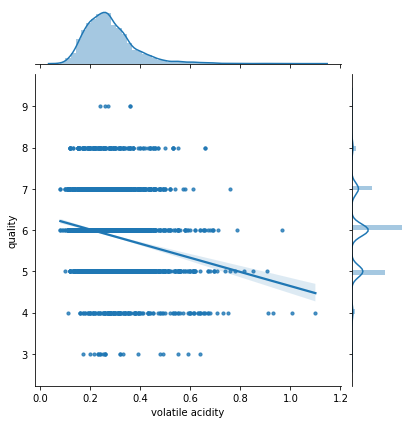

In [19]:
#Create a new dataframe containing only pH and fixed acidity columns to visualize their co-relations
volatileAcidity_quality = data[['quality', 'volatile acidity']]

#Initialize a joint-grid with the dataframe, using seaborn library
gridA = sns.JointGrid(x="volatile acidity", y="quality", data=volatileAcidity_quality, height=6)

#Draws a regression plot in the grid 
gridA = gridA.plot_joint(sns.regplot, scatter_kws={"s": 10})

#Draws a distribution plot in the same grid
gridA = gridA.plot_marginals(sns.distplot)

#### alcohol and quality

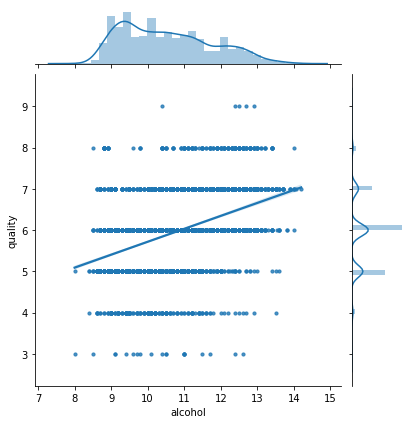

In [16]:
#Create a new dataframe containing only pH and fixed acidity columns to visualize their co-relations
alcohol_quality = data[['quality', 'alcohol']]

#Initialize a joint-grid with the dataframe, using seaborn library
gridA = sns.JointGrid(x="alcohol", y="quality", data=alcohol_quality, height=6)

#Draws a regression plot in the grid 
gridA = gridA.plot_joint(sns.regplot, scatter_kws={"s": 10})

#Draws a distribution plot in the same grid
gridA = gridA.plot_marginals(sns.distplot)

#### Barplot quality and volatile acidity

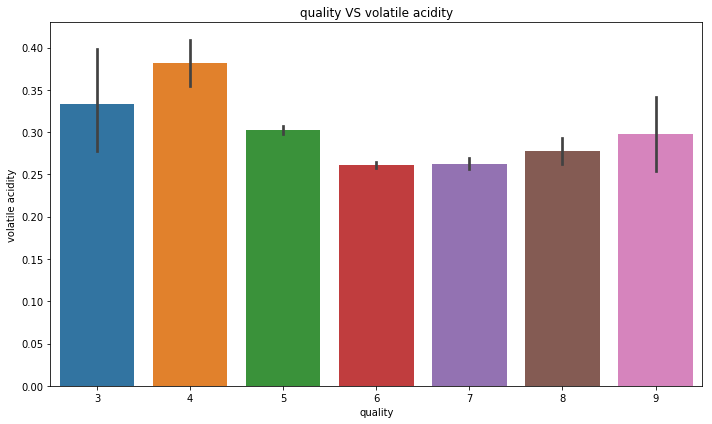

<Figure size 432x288 with 0 Axes>

In [20]:
#We can visualize relationships of discreet values better with a bar plot

fig, axs = plt.subplots(ncols=1,figsize=(10,6))
sns.barplot(x='quality', y='volatile acidity', data=volatileAcidity_quality, ax=axs)
plt.title('quality VS volatile acidity')

plt.tight_layout()
plt.show()
plt.gcf().clear()

#### Barplot quality and alcohol

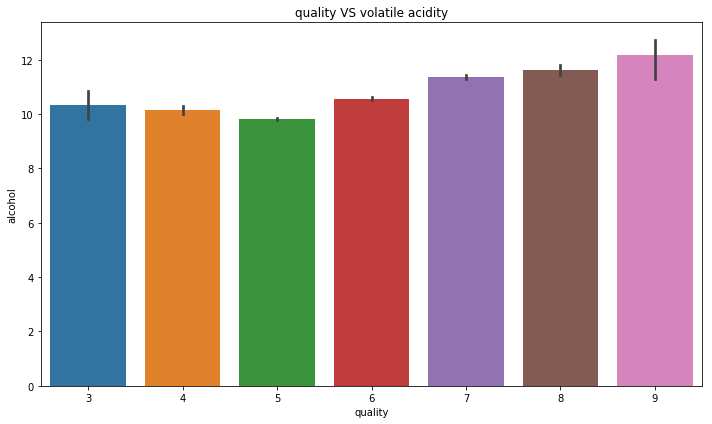

<Figure size 432x288 with 0 Axes>

In [21]:
alcohol_quality = data[['alcohol','quality']]

ig, axs = plt.subplots(ncols=1,figsize=(10,6))
sns.barplot(x='quality', y='alcohol', data=alcohol_quality, ax=axs)
plt.title('quality VS volatile acidity')

plt.tight_layout()
plt.show()
plt.gcf().clear()

## Outlier Detection:

Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An **outlier step** is calculated as **1.5** times the **interquartile range (IQR)**. A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below:

* Assign the value of the 25th percentile for the given feature to Q1. Use np.percentile for this.
* Assign the value of the 75th percentile for the given feature to Q3. Again, use np.percentile.
* Assign the calculation of an outlier step for the given feature to step.
* Optionally remove data points from the dataset by adding indices to the outliers list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!
Once you have performed this implementation, the dataset will be stored in the variable good_data.

In [70]:
data.keys()

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [71]:
# For each feature find the data points with extreme high or low values

index = pd.DataFrame()

for feature in data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(data[feature], q=25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(data[feature], q=75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    interquartile_range = Q3 - Q1
    step = 1.5 * interquartile_range
    
    # Display the outliers
#     print("Data points considered outliers for the feature '{}':".format(feature))
#     display(data[~((data[feature] >= Q1 - step) & (data[feature] <= Q3 + step))])
    aux = ~((data[feature] >= Q1 - step) & (data[feature] <= Q3 + step))
    index[feature] = aux
    
# OPTIONAL: Select the indices for data points you wish to remove
outliers = index.any(axis='columns')

# Remove the outliers, if any were specified
good_data = data.drop(data.index[outliers]).reset_index(drop = True)

#### se eliminan los outliers

In [75]:
good_data.describe()
# se puede observar que ya no aparecen los valores en max o min que antes destacan, y por consiguiente el std se ha reducido

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3854.000000,3854.000000,3854.000000,3854.000000,3854.000000,3854.000000,3854.000000,3854.000000,3854.000000,3854.000000,3854.000000,3854.000000
mean,6.813168,0.264106,0.324040,6.394668,0.042523,34.737805,137.488583,0.993918,3.186632,0.481863,10.543910,5.873638
std,0.736572,0.075870,0.086874,4.949280,0.009830,15.065523,41.350453,0.002876,0.137473,0.098202,1.193566,0.755199
min,4.800000,0.080000,0.100000,0.600000,0.016000,2.000000,21.000000,0.987110,2.830000,0.220000,8.400000,4.000000
25%,6.300000,0.210000,0.270000,1.712500,0.036000,24.000000,107.250000,0.991642,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.310000,5.300000,0.042000,34.000000,133.000000,0.993620,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.310000,0.370000,9.700000,0.049000,45.000000,167.000000,0.995940,3.280000,0.540000,11.400000,6.000000
max,8.800000,0.485000,0.570000,22.000000,0.071000,80.000000,255.000000,1.001960,3.560000,0.760000,14.200000,7.000000


# Part 2: Using Machine Learning to Predict the Quality of Wines

In [173]:
#Displays the first 2 columns
display(good_data.head(n=5))
# Split the data into features and target label
X = good_data.drop(columns='quality')
y = good_data['quality']

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### Next, shuffle and split our data-set into training and testing subsets:

In [174]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso, Ridge

In [175]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Show the results of the split
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3083, 11) (771, 11) (3083,) (771,)


### Implementation: Initial Model Evaluation

In [140]:
model = LinearRegression()
model.fit(X_train, y_train) #training the algorithm
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred)
print("Linear RMSE: {}".format(rmse))
accuracy = model.score(X_test,y_test)
print("Accuracy Linear: {}".format(accuracy))
R2 = r2_score(y_test, y_pred)
print("R2 Linear: {}".format(R2))
print("")

model_lasso = Lasso(alpha=0.1)
model_lasso.fit(X_train, y_train) #training the algorithm
y_pred_lasso = model_lasso.predict(X_test)
rmse_lasso = mean_squared_error(y_test, y_pred_lasso)
R2_lasso = r2_score(y_test, y_pred_lasso)
print("Lasso RMSE: {}".format(rmse_lasso))
accuracy_lasso = model_lasso.score(X_test,y_test)
print("Accuracy Lasso: {}".format(accuracy_lasso))
R2_lasso = r2_score(y_test, y_pred_lasso)
print("R2 Lasso: {}".format(R2_lasso))
print("")

model_ridge = Ridge(alpha=0.2)
model_ridge.fit(X_train, y_train) #training the algorithm
y_pred_ridge = model_ridge.predict(X_test)
rmse_ridge = mean_squared_error(y_test, y_pred_ridge)
R2_ridge = r2_score(y_test, y_pred_ridge)
print("Ridge RMSE: {}".format(rmse_ridge))
accuracy_ridge = model_ridge.score(X_test,y_test)
print("Accuracy Ridge: {}".format(accuracy_ridge))
R2_ridge = r2_score(y_test, y_pred_ridge)
print("R2 Ridge: {}".format(R2_ridge))
print("")
   

Linear RMSE: 0.43601009902162957
Accuracy Linear: 0.23649103795854454
R2 Linear: 0.23649103795854454

Lasso RMSE: 0.476243469025304
Accuracy Lasso: 0.16603730617603507
R2 Lasso: 0.16603730617603507

Ridge RMSE: 0.44646814928724055
Accuracy Ridge: 0.21817766604080402
R2 Ridge: 0.21817766604080402



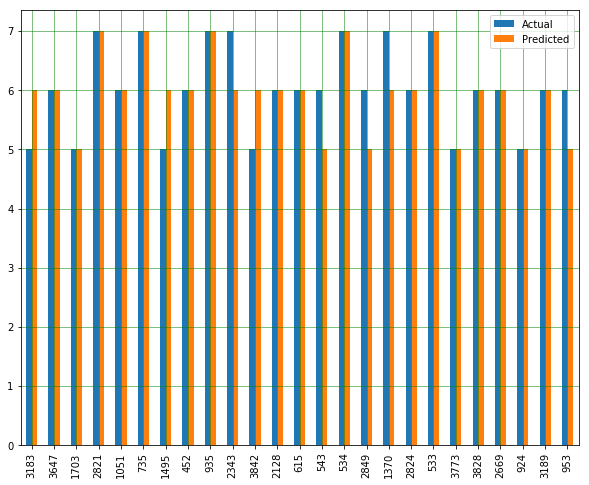

In [218]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

## Implementation Extra
### Logistic regression

In [141]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

In [185]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

model_logistic = LogisticRegression(random_state=0, multi_class='multinomial', solver='lbfgs')
model_logistic.fit(X_train_sc, y_train)
y_pred_lr = model_logistic.predict(X_test_sc)

rmse = mean_squared_error(y_test, y_pred_lr)
print("RMSE: {}".format(rmse))
accuracy = model_logistic.score(X_test_sc,y_test)
print("Accuracy: {}".format(accuracy))
R2 = r2_score(y_test, y_pred_lr)
print("R2: {}".format(R2))
print("")

RMSE: 0.5460440985732814
Accuracy: 0.5278858625162127
R2: 0.04380755430652017



#### El accuracy mejora y el error baja pero siguen siendo valores muy malos

### Random Forest

In [183]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [191]:
model_rf = RandomForestClassifier(max_depth=40, random_state=0)
model_rf.fit(X_train, y_train) 
y_pred = model_rf.predict(X_test)

rmse = mean_squared_error(y_test, y_pred)
print("RMSE: {}".format(rmse))
accuracy = model_rf.score(X_test,y_test)
print("Accuracy: {}".format(accuracy))
R2 = r2_score(y_test, y_pred)
print("R2: {}".format(R2))
print("")


RMSE: 0.3424124513618677
Accuracy: 0.7003891050583657
R2: 0.40039238559838797



#### Es el mejor resultado que se ha obtenido. El siguiente paso es usar GridSearchCV para ver si cambiando los hiperparametros el resultado mejora

In [208]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'bootstrap': [True],
    'max_depth': [2, 5, 7, 10, 20, 35, 50],
    'max_features': [2, 3, 4, 5, 6],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
model_rf = RandomForestClassifier(random_state=0)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = model_rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 1260 candidates, totalling 3780 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   53.1s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed: 16.8min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed: 24.1min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed: 35.2min
[Parallel(n_jobs=-1)]: Done 3780 out of 3780 | elapsed: 44.5min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                   

In [210]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 35,
 'max_features': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 300}

In [211]:
best_grid = grid_search.best_estimator_

In [212]:
best_grid.fit(X_train, y_train) 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=35, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [213]:
y_pred = best_grid.predict(X_test)

In [214]:
rmse = mean_squared_error(y_test, y_pred)
print("RMSE: {}".format(rmse))
accuracy = best_grid.score(X_test,y_test)
print("Accuracy: {}".format(accuracy))
R2 = r2_score(y_test, y_pred)
print("R2: {}".format(R2))
print("")


RMSE: 0.3761348897535668
Accuracy: 0.6783398184176395
R2: 0.3413401205436837



##### Pese haber usado la función GridSearchCV, se puede observar que el accuray era mejor cuando se ha creado el modelo de forma manual (ejemplo anterior)